In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
dataFilePath = 'F://MS-Course//Sem-1//Data Mining//Project//archive//Superstore.csv'
superstoreDF = pd.read_csv(dataFilePath, encoding='windows-1252')

In [3]:
superstoreDF.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [4]:
#convert date string to date format
superstoreDF["Order Date"] = pd.DatetimeIndex(superstoreDF["Order Date"])
superstoreDF["Ship Date"] = pd.DatetimeIndex(superstoreDF["Ship Date"])

In [5]:
#dataset overiew
def checkDfOverview(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
checkDfOverview(superstoreDF)

column          dtypes  nunique  sum_null
0          Row ID           int64     9994         0
1        Order ID          object     5009         0
2      Order Date  datetime64[ns]     1237         0
3       Ship Date  datetime64[ns]     1334         0
4       Ship Mode          object        4         0
5     Customer ID          object      793         0
6   Customer Name          object      793         0
7         Segment          object        3         0
8         Country          object        1         0
9            City          object      531         0
10          State          object       49         0
11    Postal Code           int64      631         0
12         Region          object        4         0
13     Product ID          object     1862         0
14       Category          object        3         0
15   Sub-Category          object       17         0
16   Product Name          object     1850         0
17          Sales         float64     5825         0
18       Quantity           int64       14         0
19       Discount         float64       12         0
20         Profit         float64     7287         0

In [6]:
# update values for null postal code
superstoreDF[superstoreDF["Postal Code"].isna()]


Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]

In [7]:
# Postal code for 'Burlington' is 5401
superstoreDF["Postal Code"]=superstoreDF["Postal Code"].fillna(5401.0)

In [8]:
superstoreDF[superstoreDF["Postal Code"]==5401.0]

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]

<AxesSubplot:>

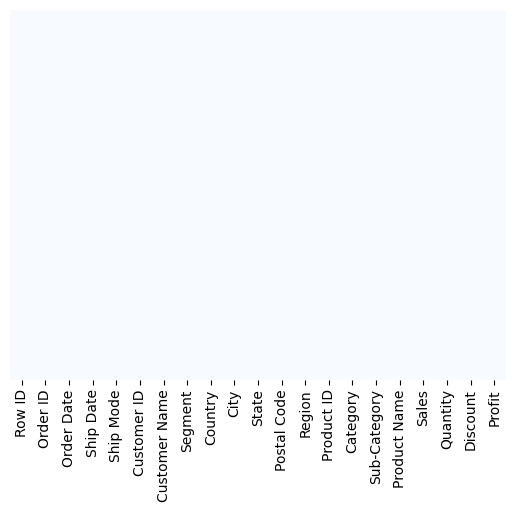

In [9]:
#checking for any other mising data

sns.heatmap(superstoreDF.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [10]:
#separate date into three columns of year, month, day

superstoreDF['Year'] = pd.DatetimeIndex(superstoreDF['Order Date']).year
superstoreDF['Month'] = pd.DatetimeIndex(superstoreDF['Order Date']).month
superstoreDF['Day'] = pd.DatetimeIndex(superstoreDF['Order Date']).day



In [11]:
superstoreDF.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        Chairs   
2  Office Supplies        Labels   
3        Furniture        Tables   
4  Office Supplies       Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  Year  Month  Day  
0     0.00   41.9136  2016     11    8  
1     0.00  219.5820  2016     11    8  
2     0.00    6.8714  2016      6   12  
3     0.45 -383.0310  2015     10   11  
4     0.20    2.5164  2015     10   11  

[5 rows x 24 columns]

In [12]:
#superstoreDF.drop(['Row ID','Postal Code'], axis=1).describe().T
superstoreDF.describe().T

count          mean           std       min          25%  \
Row ID       9994.0   4997.500000   2885.163629     1.000   2499.25000   
Postal Code  9994.0  55190.379428  32063.693350  1040.000  23223.00000   
Sales        9994.0    229.858001    623.245101     0.444     17.28000   
Quantity     9994.0      3.789574      2.225110     1.000      2.00000   
Discount     9994.0      0.156203      0.206452     0.000      0.00000   
Profit       9994.0     28.656896    234.260108 -6599.978      1.72875   
Year         9994.0   2015.722233      1.123555  2014.000   2015.00000   
Month        9994.0      7.809686      3.284654     1.000      5.00000   
Day          9994.0     15.468481      8.748327     1.000      8.00000   

                    50%        75%        max  
Row ID        4997.5000   7495.750   9994.000  
Postal Code  56430.5000  90008.000  99301.000  
Sales           54.4900    209.940  22638.480  
Quantity         3.0000      5.000     14.000  
Discount         0.2000      0.200      0.800  
Profit           8.6665     29.364   8399.976  
Year          2016.0000   2017.000   2017.000  
Month            9.0000     11.000     12.000  
Day             15.0000     23.000     31.000

array([[<AxesSubplot:title={'center':'Order Date'}>,
        <AxesSubplot:title={'center':'Ship Date'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>]], dtype=object)

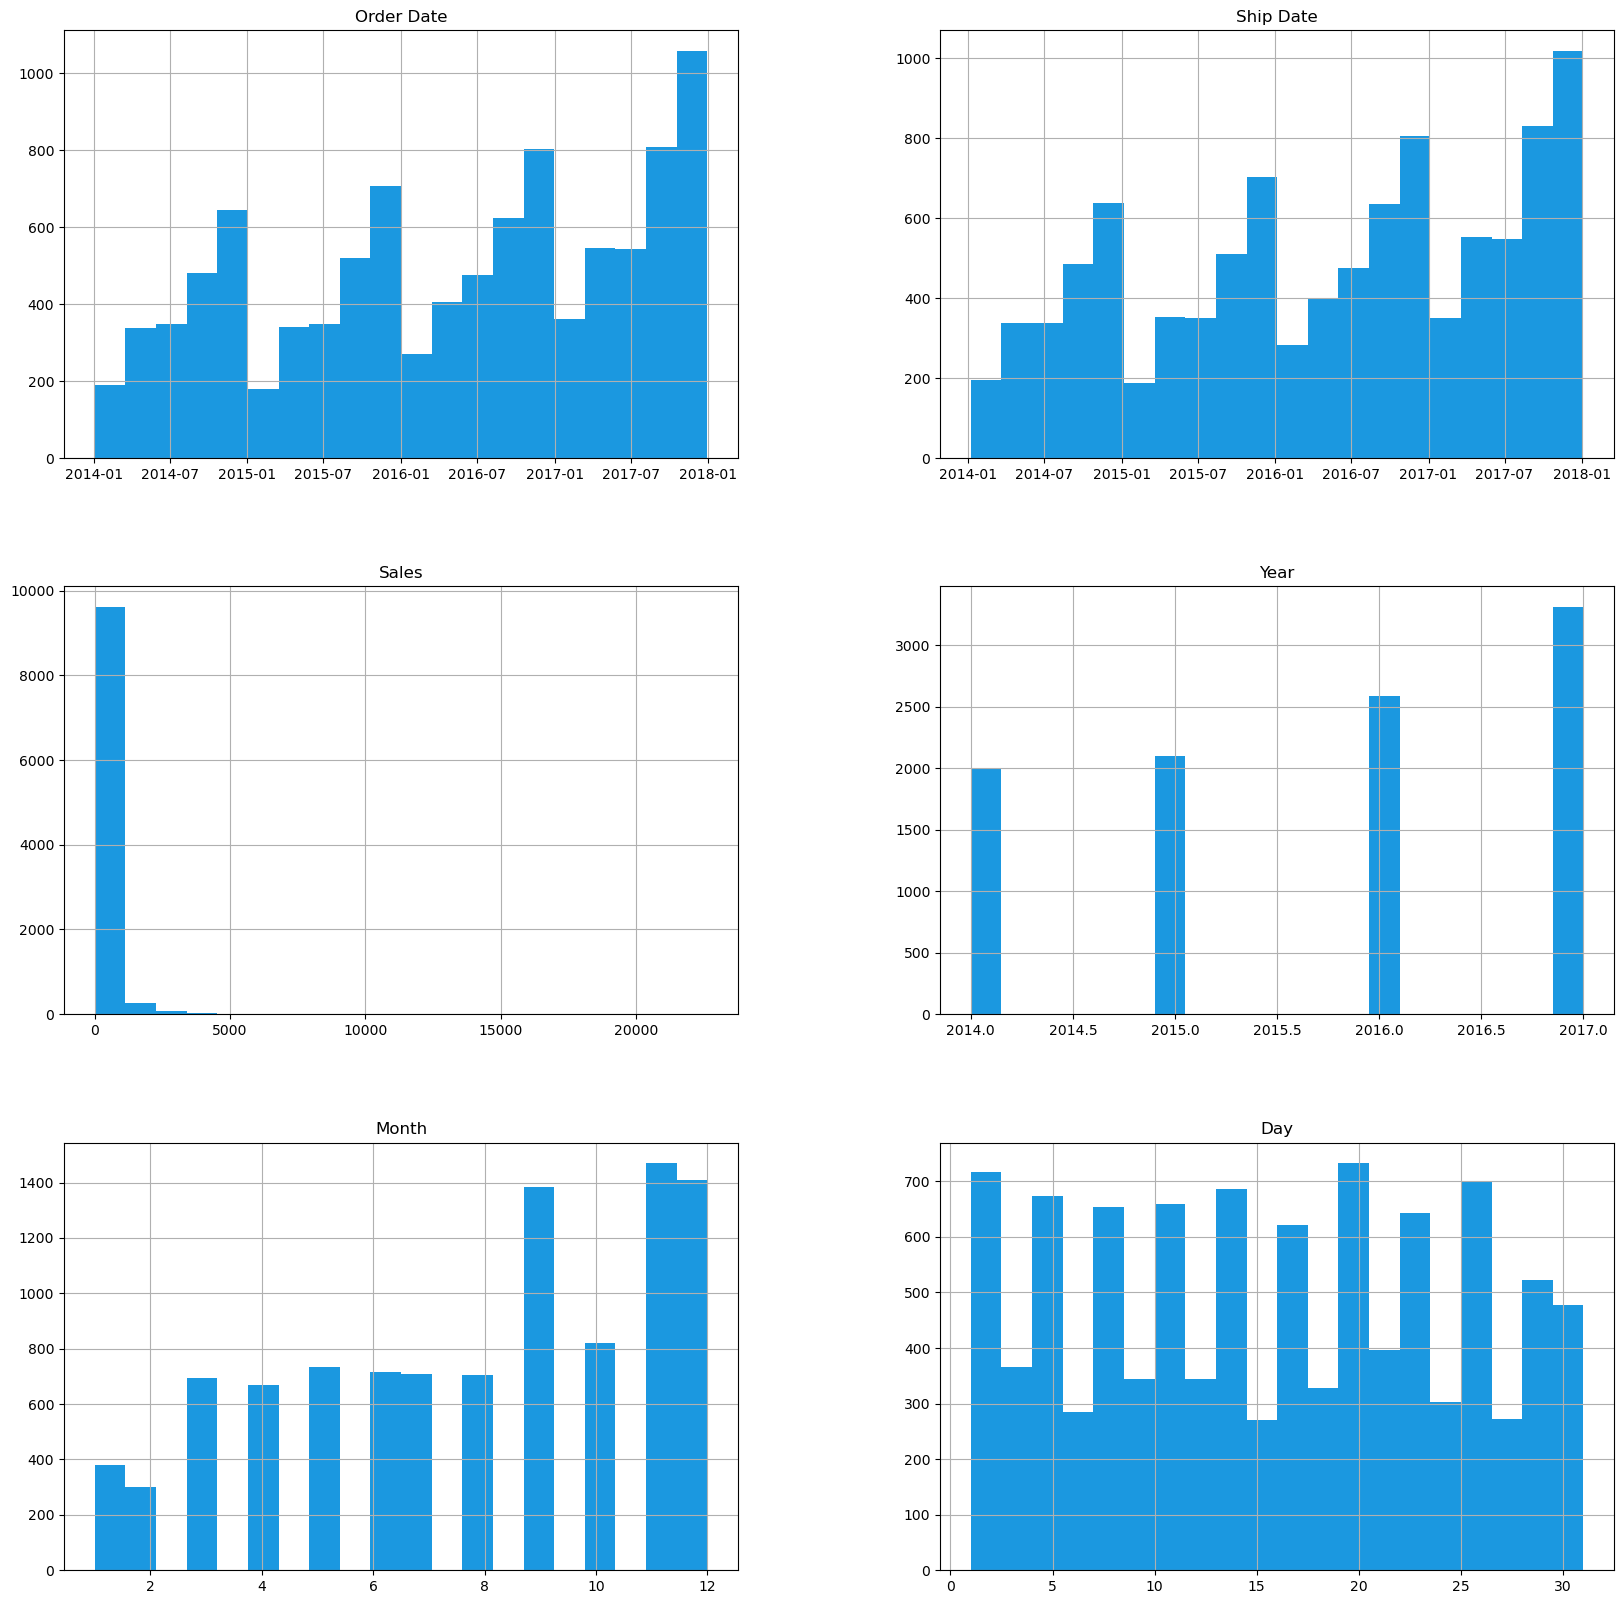

In [13]:
#EDA
superstoreDF[['Order Date' , 'Ship Date' , 'Sales' , 'Year', 'Month', 'Day']].hist(bins=20 ,figsize = (20,20), color = '#1b98e0')

In [14]:
#find top customer

top_customer = superstoreDF.pivot_table(values = "Sales" , index = "Customer Name" , aggfunc = "sum")
top_customer = top_customer.sort_values(by=['Sales'], ascending=False).head(20)
top_customer.reset_index(inplace=True) # we will have to reset the index to add the customer name into dataframe 
top_customer['Sales']=top_customer['Sales'].round(2)
top_customer

Customer Name     Sales
0          Sean Miller  25043.05
1         Tamara Chand  19052.22
2         Raymond Buch  15117.34
3         Tom Ashbrook  14595.62
4        Adrian Barton  14473.57
5         Ken Lonsdale  14175.23
6         Sanjit Chand  14142.33
7         Hunter Lopez  12873.30
8         Sanjit Engle  12209.44
9   Christopher Conant  12129.07
10        Todd Sumrall  11891.75
11           Greg Tran  11820.12
12        Becky Martin  11789.63
13         Seth Vernon  11470.95
14     Caroline Jumper  11164.97
15         Clay Ludtke  10880.55
16       Maria Etezadi  10663.73
17      Karen Ferguson  10604.27
18        Bill Shonely  10501.65
19        Edward Hooks  10310.88

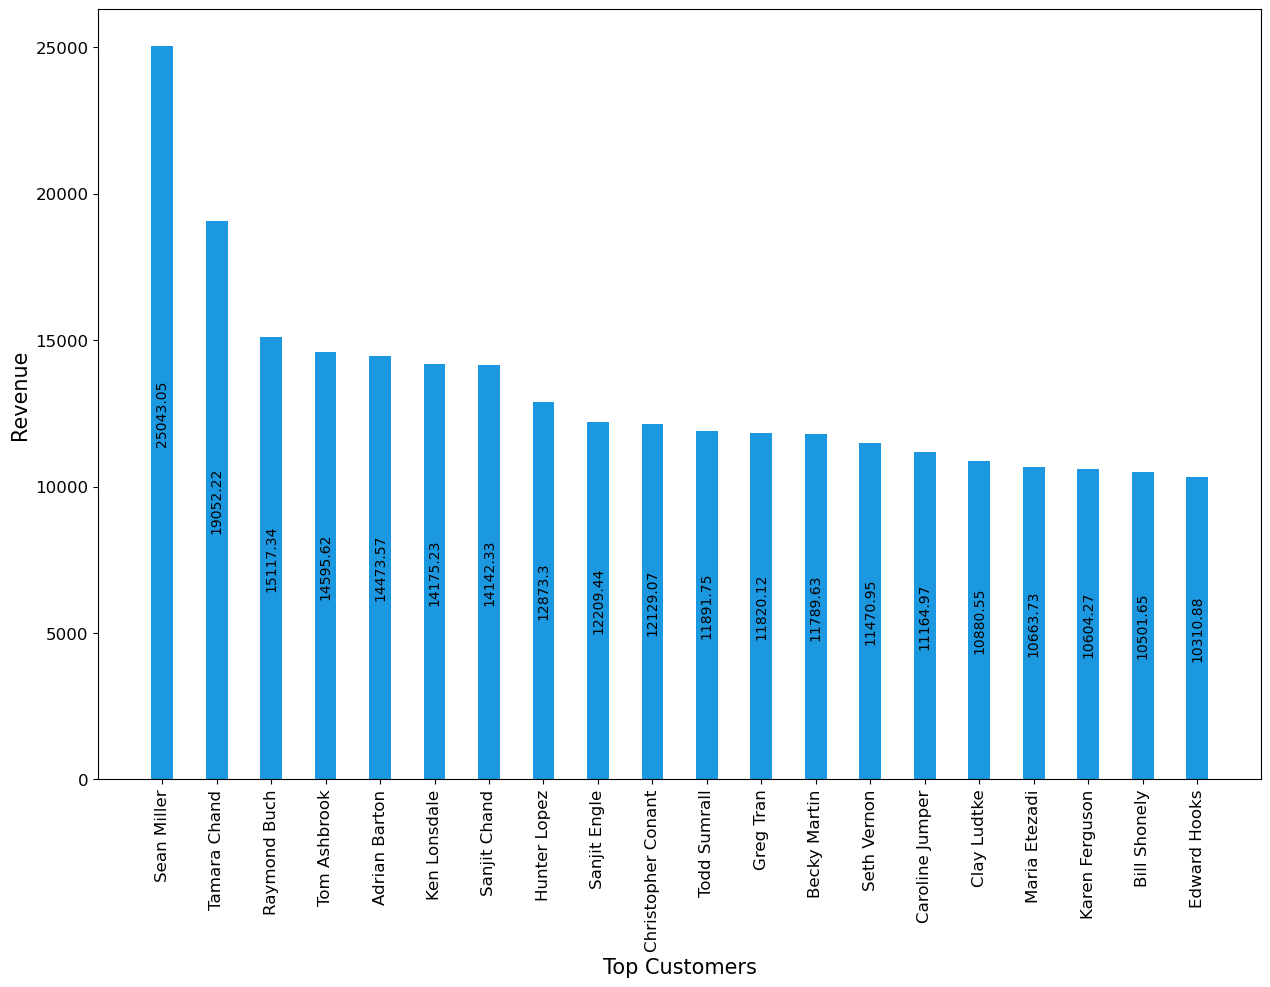

In [15]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(top_customer['Customer Name'],top_customer['Sales'] , color ='#1b98e0',
        width = 0.4)
 
plt.xlabel("Top Customers",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(top_customer['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 )
plt.show()

In [16]:
# find cities purchased most

top_cities = superstoreDF.pivot_table(values = "Sales" , index = "City" , aggfunc = "sum")
top_cities = top_cities.sort_values(by=['Sales'], ascending=False).head(20)
top_cities.reset_index(inplace=True)
top_cities['Sales']=top_cities['Sales'].round(2)
top_cities

City      Sales
0   New York City  256368.16
1     Los Angeles  175851.34
2         Seattle  119540.74
3   San Francisco  112669.09
4    Philadelphia  109077.01
5         Houston   64504.76
6         Chicago   48539.54
7       San Diego   47521.03
8    Jacksonville   44713.18
9     Springfield   43054.34
10        Detroit   42446.94
11       Columbus   38706.24
12         Newark   28576.12
13       Columbia   25283.32
14      Lafayette   25036.20
15        Jackson   24963.86
16    San Antonio   21843.53
17     Burlington   21668.08
18      Arlington   20214.53
19         Dallas   20131.93

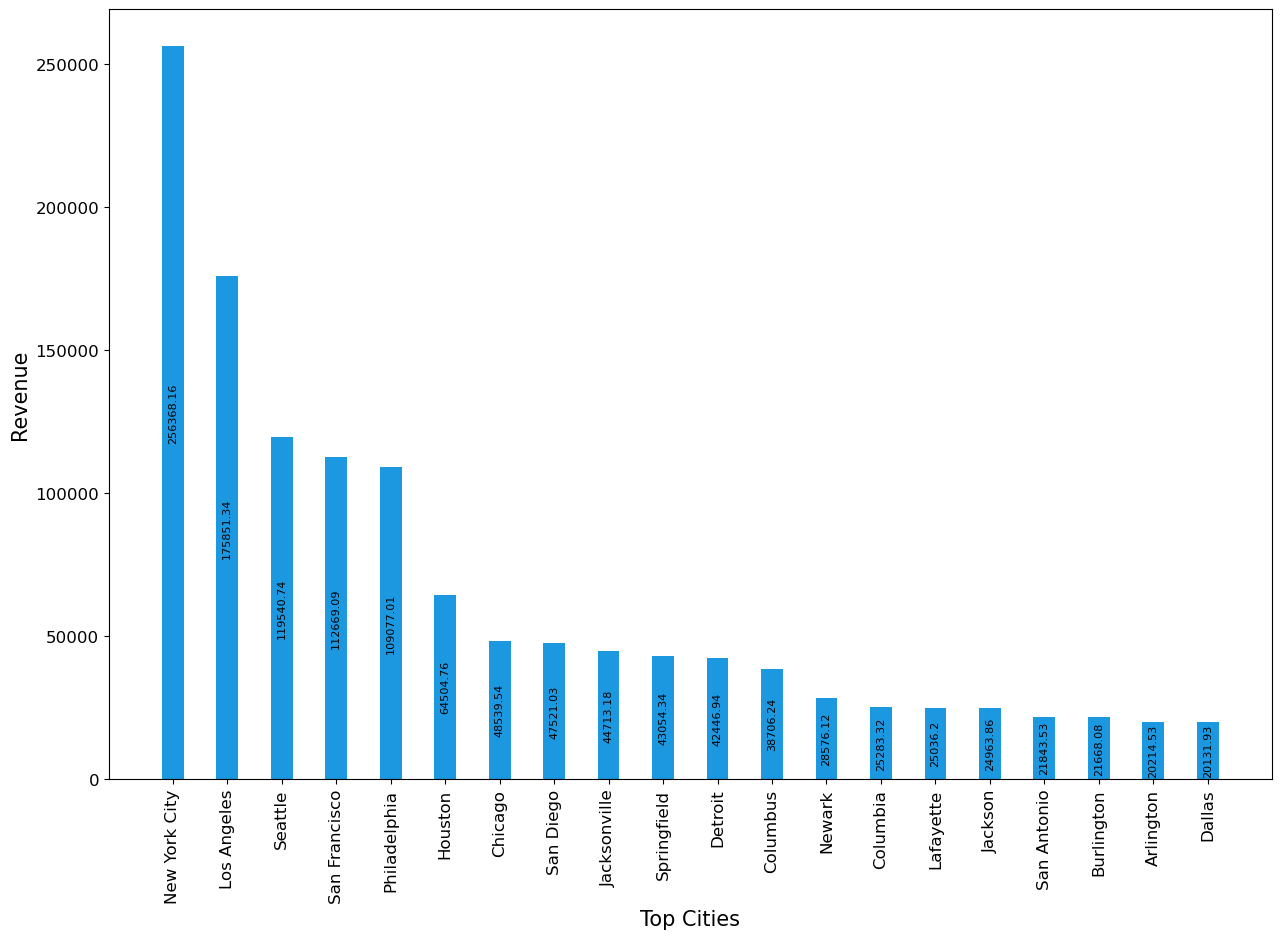

In [17]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(top_cities['City'],top_cities['Sales'] , color ='#1b98e0', width = 0.4) 
        
plt.xlabel("Top Cities",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
        
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(top_cities['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='black' , fontsize=8)
plt.show()

In [18]:

#find day of week by adding new column
superstoreDF['Day of Week'] = superstoreDF['Order Date'].dt.strftime('%A')



In [19]:
#find best day in a week where sales were high
#dow - day of week
best_dow = pd.pivot_table(superstoreDF,values = "Sales" , index = ["Day of Week"] , aggfunc = "sum")
best_dow = best_dow.sort_values(by=['Sales'], ascending=False).head(20)
best_dow.reset_index(inplace=True) 
best_dow['Sales']=best_dow['Sales'].round(2)
best_dow

Day of Week      Sales
0      Monday  428937.82
1      Friday  427692.26
2      Sunday  385353.85
3    Saturday  357984.68
4    Thursday  321965.78
5     Tuesday  287209.50
6   Wednesday   88056.98

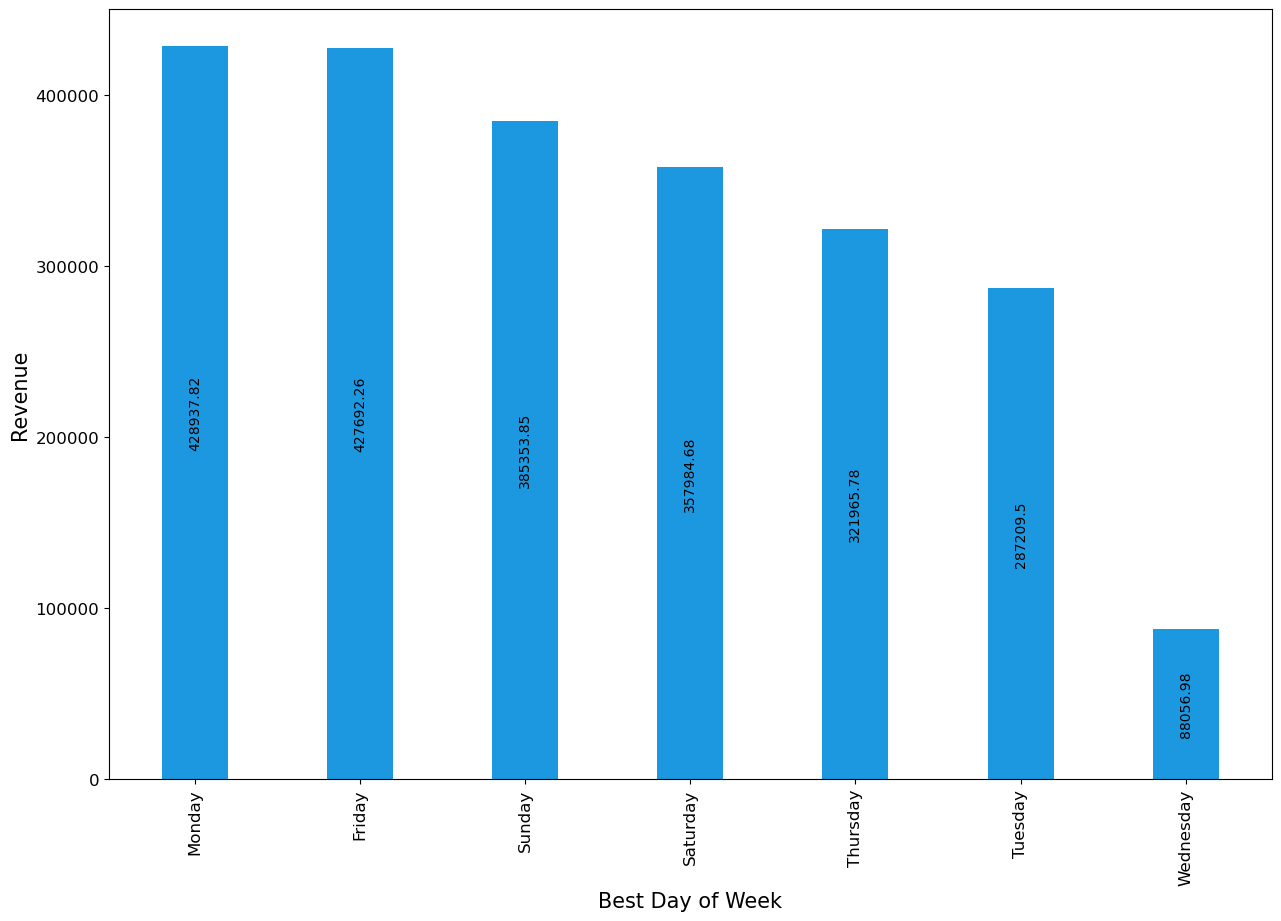

In [20]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(best_dow['Day of Week'],best_dow['Sales'] , color ='#1b98e0',
        width = 0.4)
 
plt.xlabel("Best Day of Week",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_dow['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='black')
plt.show()

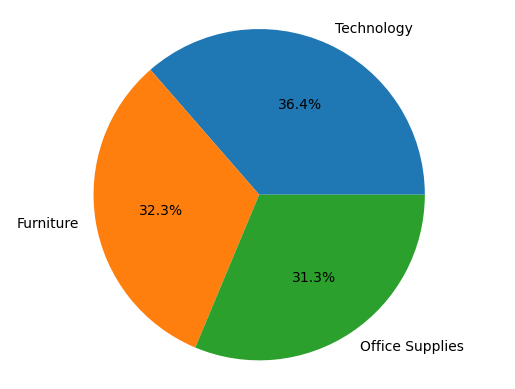

In [21]:
best_category = superstoreDF.pivot_table(values = "Sales" , index = "Category" , aggfunc = "sum")
best_category = best_category.sort_values(by=['Sales'], ascending=False).head()
best_category.reset_index(inplace=True)
best_category['Sales']=best_category['Sales'].round(2)
best_category

plt.pie(best_category['Sales'] , labels=best_category['Category'] , autopct='%1.1f%%')
plt.axis('equal')
plt.show()

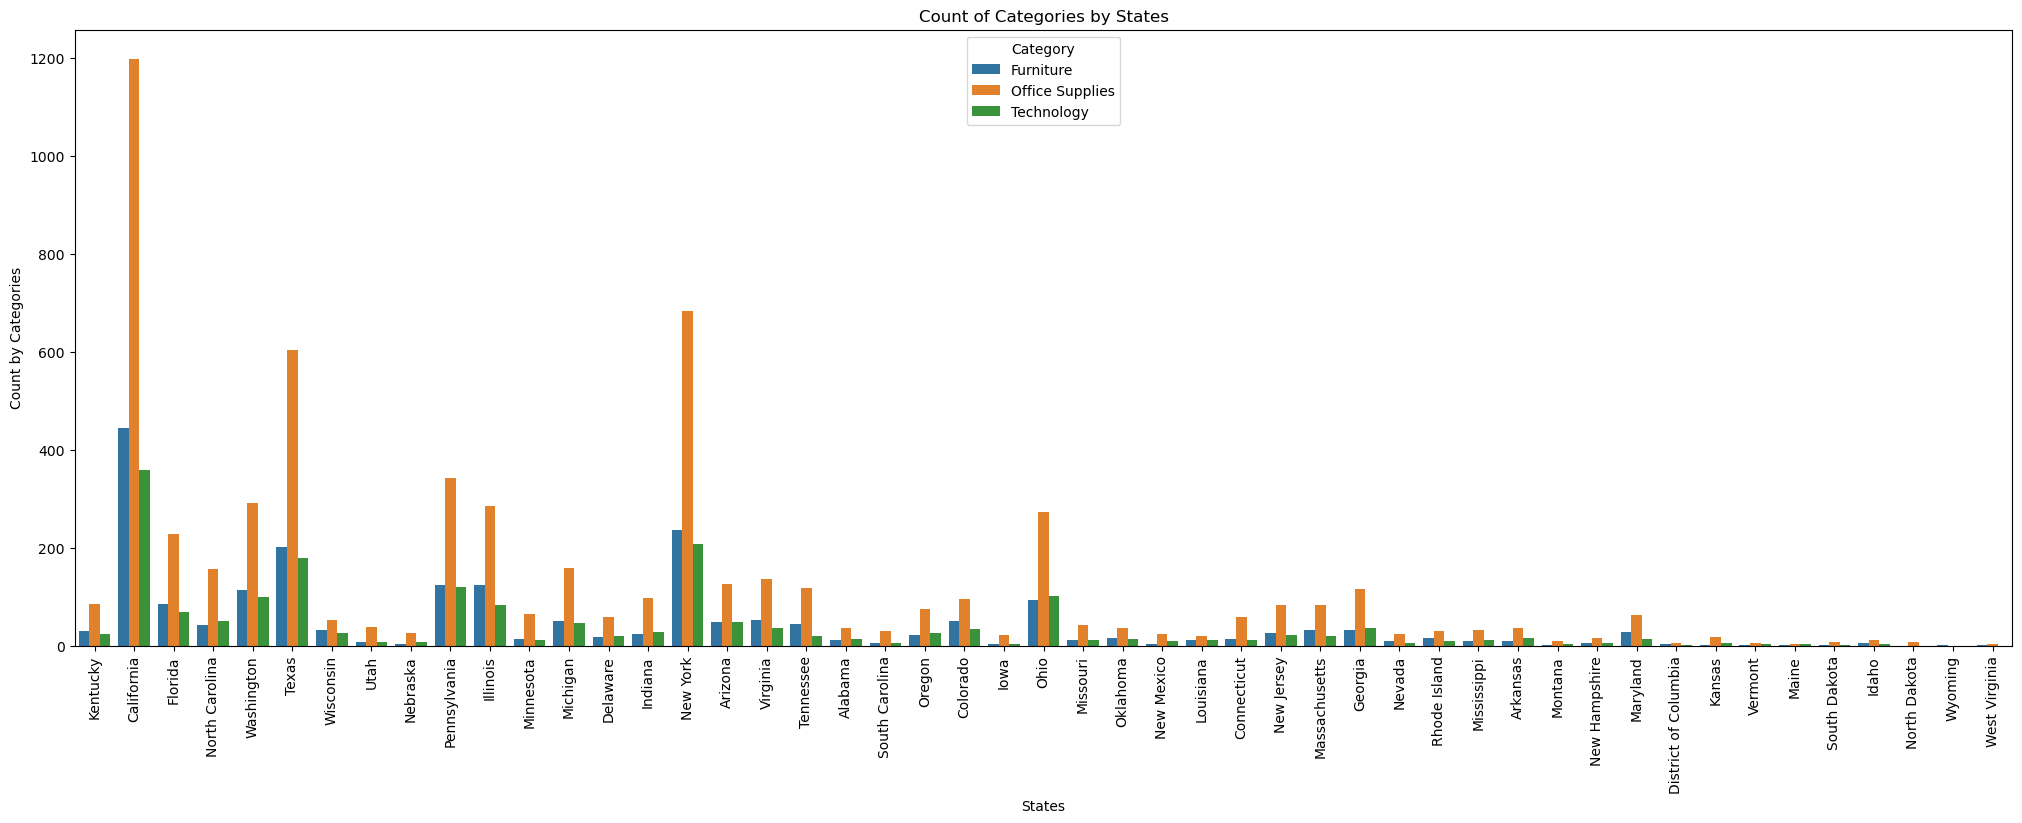

In [22]:
#find product categories by states
plt.figure(figsize=(25,8))
sns.countplot(data=superstoreDF,x="State",hue='Category' )
plt.title("Count of Categories by States")
plt.xlabel("States")
plt.ylabel("Count by Categories")
plt.xticks(rotation=90)
plt.show()

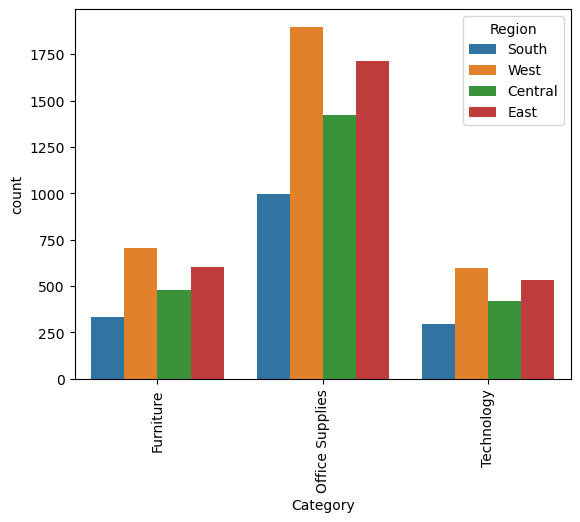

In [23]:
sns.countplot(data=superstoreDF,x="Category",hue='Region')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Number of Customers Per Year')

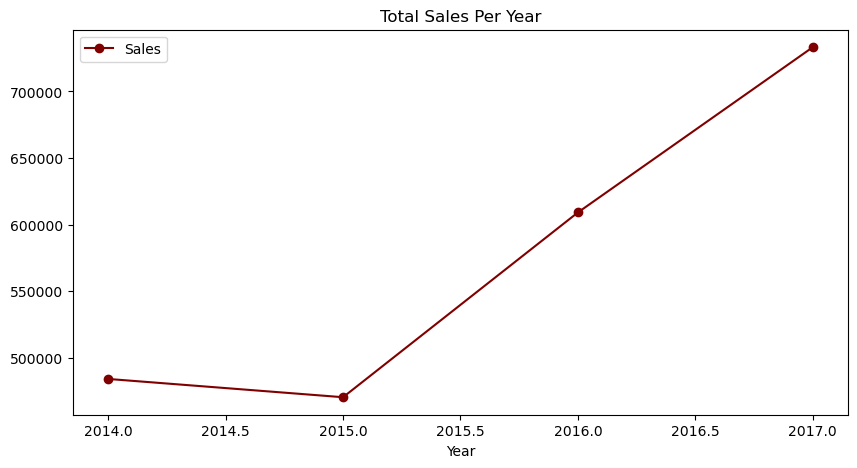

<Figure size 640x480 with 0 Axes>

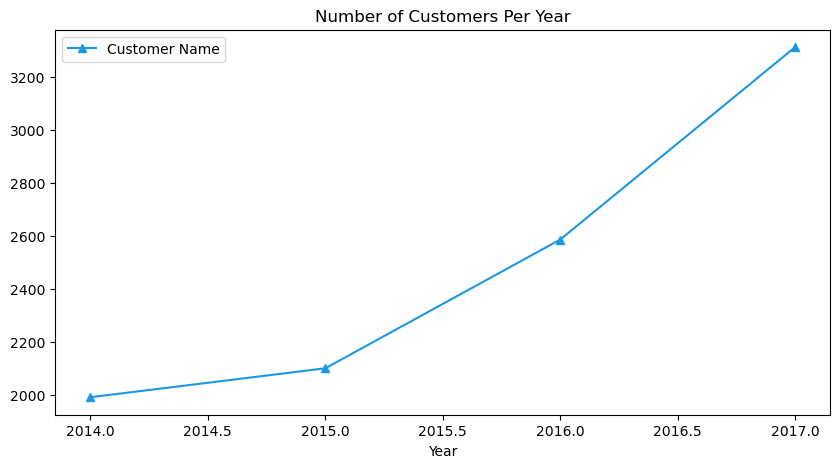

In [24]:
#looking at total sales vs customers per years

axis = superstoreDF.groupby('Year')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'maroon')
axis.set_title('Total Sales Per Year')

plt.figure()
axis = superstoreDF.groupby('Year')[['Customer Name']].count().plot(figsize = (10,5), marker = '^', color = '#1b98e0')
axis.set_title('Number of Customers Per Year')

Text(0.5, 1.0, 'Number of Customers Per Month')

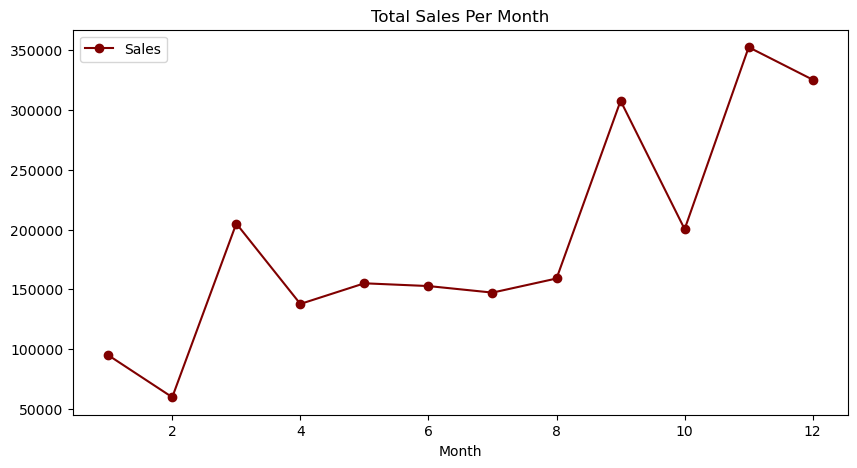

<Figure size 640x480 with 0 Axes>

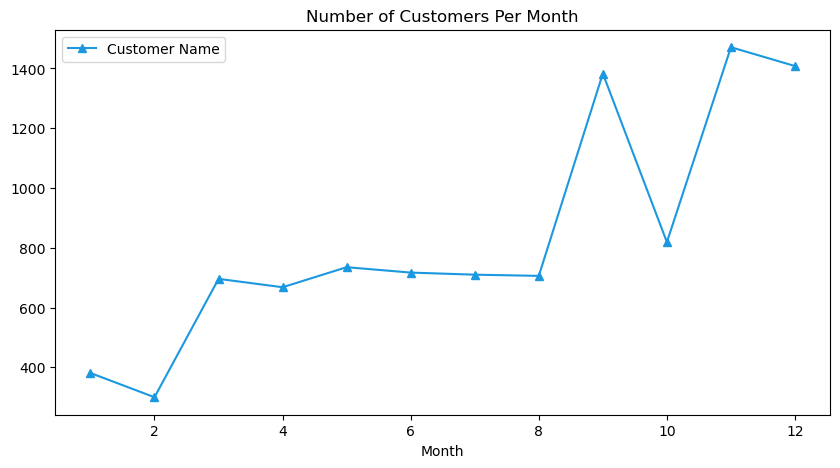

In [25]:
#seems sales peak out during year end - due to holidays, thanks giving ,christmas
axis = superstoreDF.groupby('Month')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'maroon')
axis.set_title('Total Sales Per Month')

plt.figure()
axis = superstoreDF.groupby('Month')[['Customer Name']].count().plot(figsize = (10,5), marker = '^', color = '#1b98e0')
axis.set_title('Number of Customers Per Month')

Text(0.5, 1.0, 'Number of Customers Per Day')

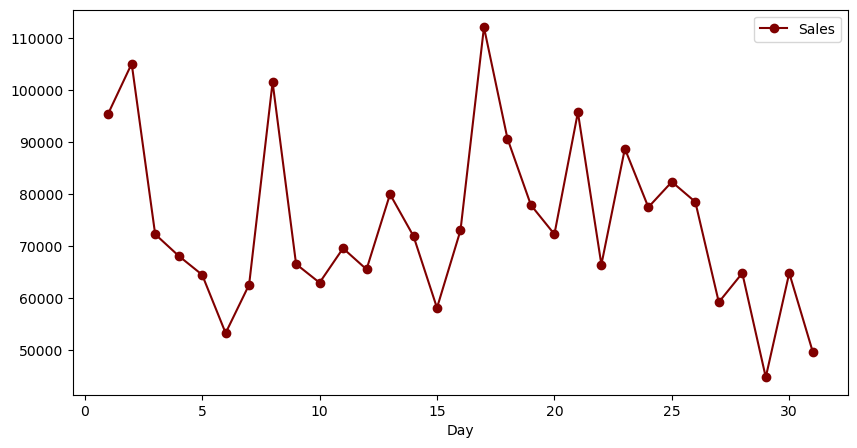

<Figure size 640x480 with 0 Axes>

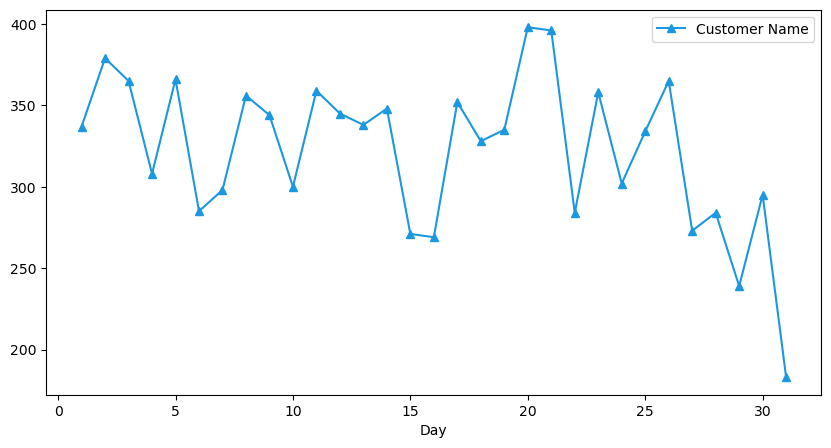

In [26]:
#No of customers having impact of sales

ax = superstoreDF.groupby('Day')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'maroon')
axis.set_title('Total Sales Per Day')

plt.figure()
ax = superstoreDF.groupby('Day')[['Customer Name']].count().plot(figsize = (10,5), marker = '^', color = '#1b98e0')
axis.set_title('Number of Customers Per Day')

<AxesSubplot:xlabel='Order Date'>

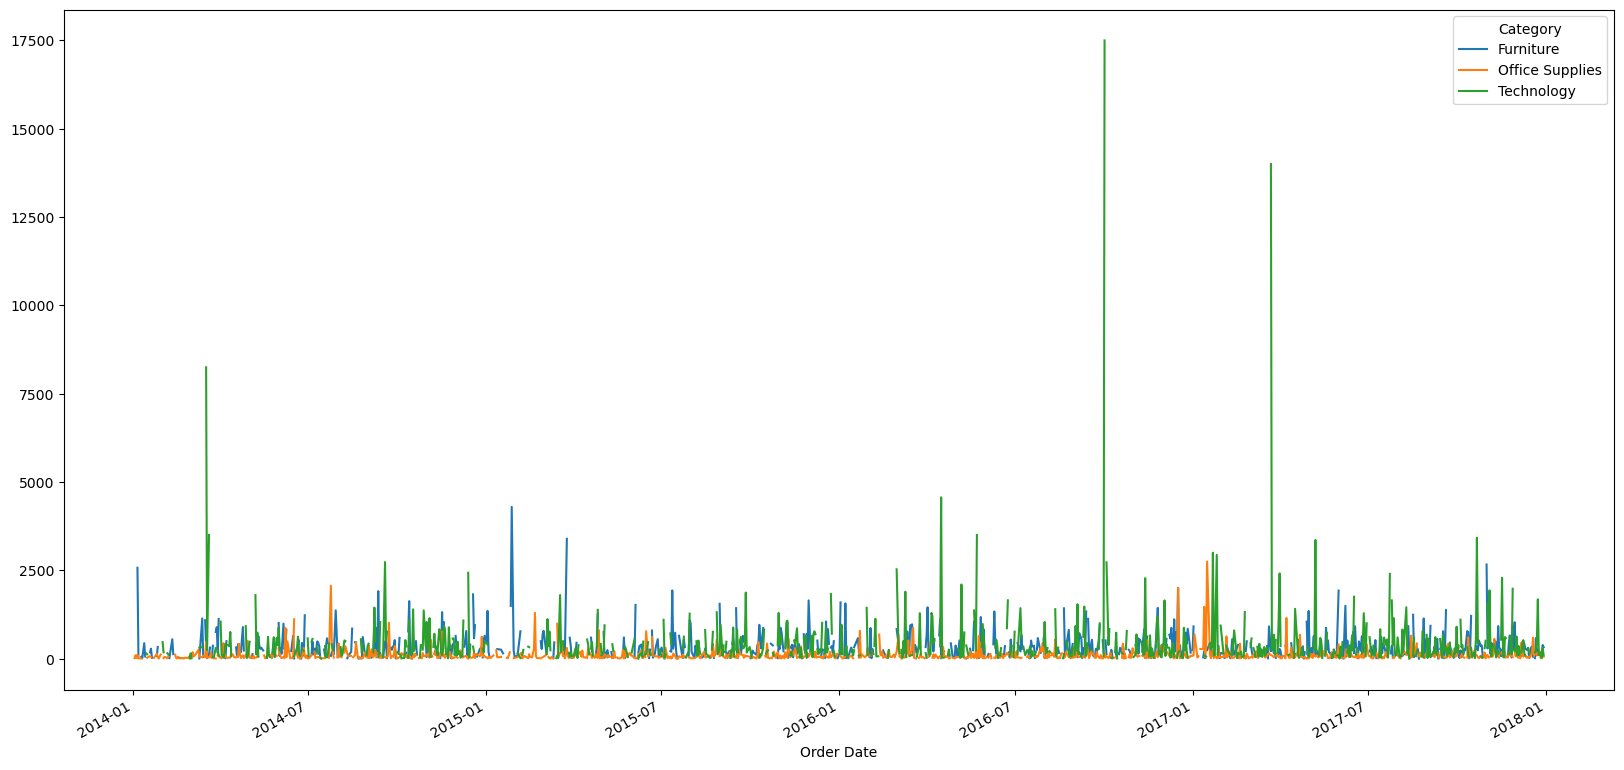

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
superstoreDF.groupby(['Order Date','Category']).mean()['Sales'].unstack().plot(ax=ax)

In [28]:
# train the model
from prophet import Prophet

In [29]:
sales_forecasting_prophet_df = superstoreDF.rename(columns={'Order Date':'ds', 'Sales':'y'})

In [30]:
sales_forecasting_prophet_df

Row ID        Order ID         ds  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Sub-Category                                       Product Name  \
0     ...    Bookcases                  Bush Somerset Collection Bookcase   
1     ...       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2     ...       Labels  Self-Adhesive Address Labels for Typewriters b...   
3     ...       Tables      Bretford CR4500 Series Slim Rectangular Table   
4     ...      Storage                     Eldon Fold 'N Roll Cart System   
...   ...          ...                                                ...   
9989  ...  Furnishings                             Ultra Door Pull Handle   
9990  ...  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   
9991  ...       Phones                              Aastra 57i VoIP phone   
9992  ...        Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   
9993  ...   Appliances  Acco 7-Outlet Masterpiece Power Center, Wihtou...   

             y Quantity Discount    Profit  Year  Month  Day  Day of Week  
0     261.9600        2     0.00   41.9136  2016     11    8      Tuesday  
1     731.9400        3     0.00  219.5820  2016     11    8      Tuesday  
2      14.6200        2     0.00    6.8714  2016      6   12       Sunday  
3     957.5775        5     0.45 -383.0310  2015     10   11       Sunday  
4      22.3680        2     0.20    2.5164  2015     10   11       Sunday  
...        ...      ...      ...       ...   ...    ...  ...          ...  
9989   25.2480        3     0.20    4.1028  2014      1   21      Tuesday  
9990   91.9600        2     0.00   15.6332  2017      2   26       Sunday  
9991  258.5760        2     0.20   19.3932  2017      2   26       Sunday  
9992   29.6000        4     0.00   13.3200  2017      2   26       Sunday  
9993  243.1600        2     0.00   72.9480  2017      5    4     Thursday  

[9994 rows x 25 columns]

In [31]:
modelForecast = Prophet(changepoint_range=0.8)
modelForecast.fit(sales_forecasting_prophet_df)

11:55:16 - cmdstanpy - INFO - Chain [1] start processing
11:55:16 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
futureForecasting = modelForecast.make_future_dataframe(periods=365)
predictForecast = modelForecast.predict(futureForecasting)
predictForecast.sort_values(by='ds', ascending = False)

ds       trend  yhat_lower   yhat_upper  trend_lower  \
1601 2018-12-30  198.354384 -567.681246   988.855577   193.057098   
1600 2018-12-29  198.402520 -605.350056   973.258099   193.139487   
1599 2018-12-28  198.450657 -628.197986   978.587640   193.221875   
1598 2018-12-27  198.498793 -592.380428   936.345776   193.304558   
1597 2018-12-26  198.546929 -587.290712   974.032219   193.392181   
...         ...         ...         ...          ...          ...   
4    2014-01-07  233.107562 -537.415656  1024.918204   233.107562   
3    2014-01-06  233.085706 -581.657792  1077.577940   233.085706   
2    2014-01-05  233.063850 -592.644618   983.554420   233.063850   
1    2014-01-04  233.041994 -572.904854  1020.188167   233.041994   
0    2014-01-03  233.020138 -542.857819  1040.171884   233.020138   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1601   203.312234        4.841989              4.841989              4.841989   
1600   203.324249       -1.241519             -1.241519             -1.241519   
1599   203.336512       18.476848             18.476848             18.476848   
1598   203.351257        7.344144              7.344144              7.344144   
1597   203.380477       22.546767             22.546767             22.546767   
...           ...             ...                   ...                   ...   
4      233.107562       18.131626             18.131626             18.131626   
3      233.085706       -9.945656             -9.945656             -9.945656   
2      233.063850      -10.688409            -10.688409            -10.688409   
1      233.041994      -17.213061            -17.213061            -17.213061   
0      233.020138        2.549965              2.549965              2.549965   

         weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
1601  -5.633165     -5.633165     -5.633165  10.475155     10.475155   
1600 -14.203458    -14.203458    -14.203458  12.961939     12.961939   
1599   3.232421      3.232421      3.232421  15.244427     15.244427   
1598  -9.918454     -9.918454     -9.918454  17.262598     17.262598   
1597   3.580847      3.580847      3.580847  18.965920     18.965920   
...         ...           ...           ...        ...           ...   
4     26.142620     26.142620     26.142620  -8.010994     -8.010994   
3     -3.200810     -3.200810     -3.200810  -6.744846     -6.744846   
2     -5.633165     -5.633165     -5.633165  -5.055244     -5.055244   
1    -14.203458    -14.203458    -14.203458  -3.009603     -3.009603   
0      3.232421      3.232421      3.232421  -0.682456     -0.682456   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1601     10.475155                   0.0                         0.0   
1600     12.961939                   0.0                         0.0   
1599     15.244427                   0.0                         0.0   
1598     17.262598                   0.0                         0.0   
1597     18.965920                   0.0                         0.0   
...            ...                   ...                         ...   
4        -8.010994                   0.0                         0.0   
3        -6.744846                   0.0                         0.0   
2        -5.055244                   0.0                         0.0   
1        -3.009603                   0.0                         0.0   
0        -0.682456                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1601                         0.0  203.196374  
1600                         0.0  197.161002  
1599                         0.0  216.927504  
1598                         0.0  205.842937  
1597                         0.0  221.093695  
...                          ...         ...  
4                            0.0  251.239188  
3                            0.0  223.140050  
2                            0.0  222.375441  
1          

In [33]:
#predictForecast.sort_values(by='ds', ascending = False)
predictForecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','additive_terms','multiplicative_terms']].tail()

ds        yhat  yhat_lower  yhat_upper  additive_terms  \
1597 2018-12-26  221.093695 -587.290712  974.032219       22.546767   
1598 2018-12-27  205.842937 -592.380428  936.345776        7.344144   
1599 2018-12-28  216.927504 -628.197986  978.587640       18.476848   
1600 2018-12-29  197.161002 -605.350056  973.258099       -1.241519   
1601 2018-12-30  203.196374 -567.681246  988.855577        4.841989   

      multiplicative_terms  
1597                   0.0  
1598                   0.0  
1599                   0.0  
1600                   0.0  
1601                   0.0

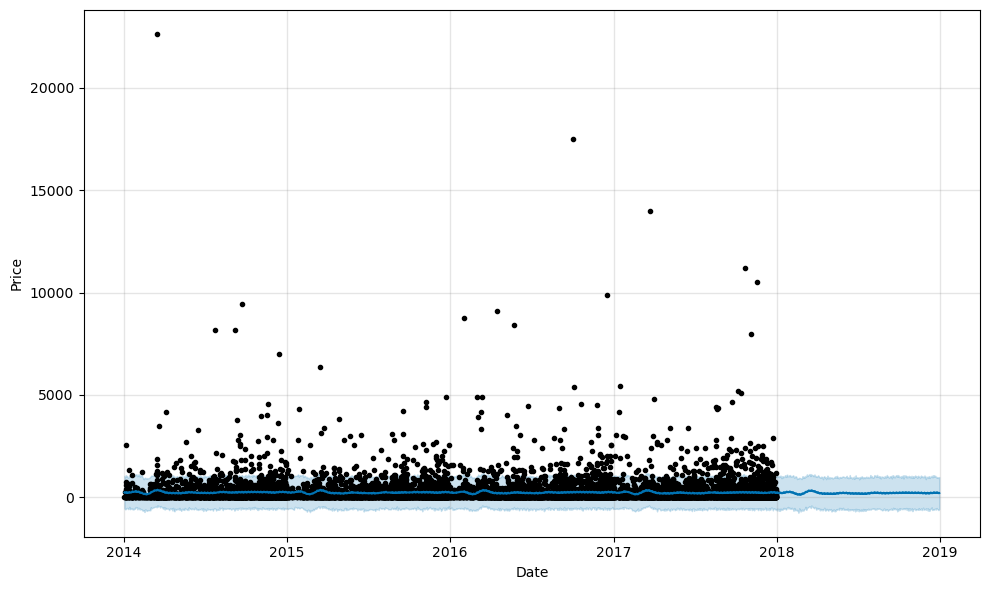

In [34]:
figure = modelForecast.plot(predictForecast, xlabel='Date', ylabel='Price')

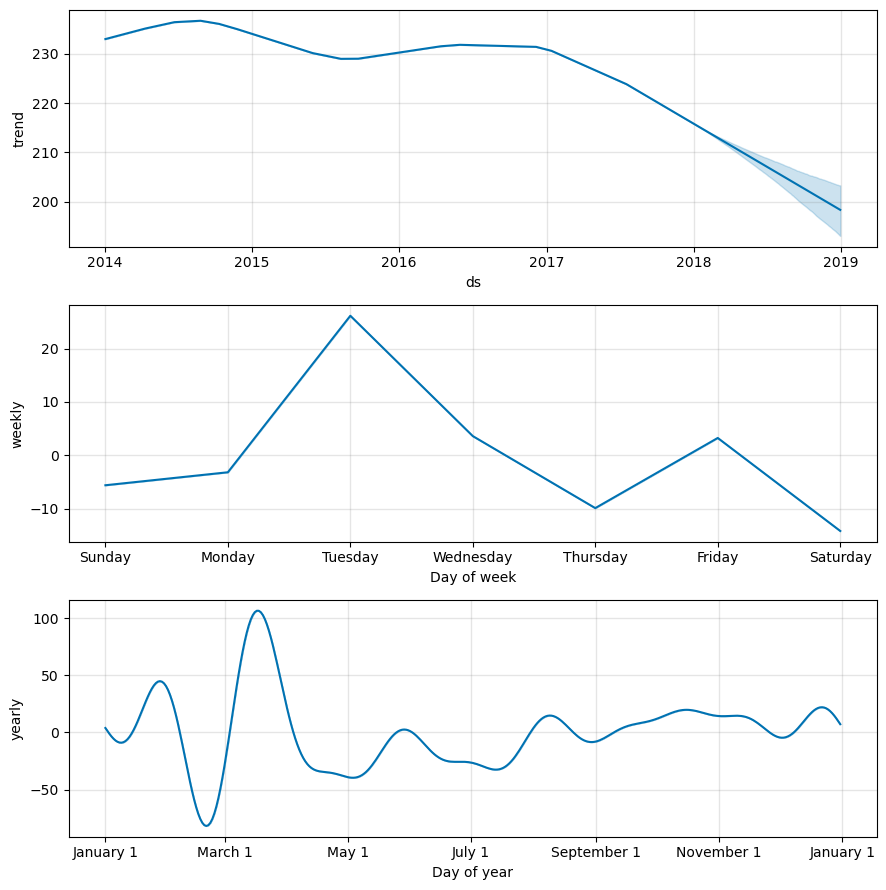

In [35]:
figure3 = modelForecast.plot_components(predictForecast)


In [36]:
predictForecast[predictForecast["ds"] > "01-01-2018"]

ds       trend  yhat_lower   yhat_upper  trend_lower  \
1239 2018-01-02  215.779664 -549.466216  1081.641805   215.779664   
1240 2018-01-03  215.731528 -574.566277  1019.090848   215.731528   
1241 2018-01-04  215.683392 -583.190853   994.874821   215.683392   
1242 2018-01-05  215.635256 -662.401298  1047.943758   215.635256   
1243 2018-01-06  215.587119 -564.951071   979.169663   215.587119   
...         ...         ...         ...          ...          ...   
1597 2018-12-26  198.546929 -587.290712   974.032219   193.392181   
1598 2018-12-27  198.498793 -592.380428   936.345776   193.304558   
1599 2018-12-28  198.450657 -628.197986   978.587640   193.221875   
1600 2018-12-29  198.402520 -605.350056   973.258099   193.139487   
1601 2018-12-30  198.354384 -567.681246   988.855577   193.057098   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1239   215.779664       27.989433             27.989433             27.989433   
1240   215.731528        2.898391              2.898391              2.898391   
1241   215.683392      -12.928057            -12.928057            -12.928057   
1242   215.635256       -1.822823             -1.822823             -1.822823   
1243   215.587119      -20.948304            -20.948304            -20.948304   
...           ...             ...                   ...                   ...   
1597   203.380477       22.546767             22.546767             22.546767   
1598   203.351257        7.344144              7.344144              7.344144   
1599   203.336512       18.476848             18.476848             18.476848   
1600   203.324249       -1.241519             -1.241519             -1.241519   
1601   203.312234        4.841989              4.841989              4.841989   

         weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
1239  26.142620     26.142620     26.142620   1.846813      1.846813   
1240   3.580847      3.580847      3.580847  -0.682456     -0.682456   
1241  -9.918454     -9.918454     -9.918454  -3.009603     -3.009603   
1242   3.232421      3.232421      3.232421  -5.055244     -5.055244   
1243 -14.203458    -14.203458    -14.203458  -6.744846     -6.744846   
...         ...           ...           ...        ...           ...   
1597   3.580847      3.580847      3.580847  18.965920     18.965920   
1598  -9.918454     -9.918454     -9.918454  17.262598     17.262598   
1599   3.232421      3.232421      3.232421  15.244427     15.244427   
1600 -14.203458    -14.203458    -14.203458  12.961939     12.961939   
1601  -5.633165     -5.633165     -5.633165  10.475155     10.475155   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1239      1.846813                   0.0                         0.0   
1240     -0.682456                   0.0                         0.0   
1241     -3.009603                   0.0                         0.0   
1242     -5.055244                   0.0                         0.0   
1243     -6.744846                   0.0                         0.0   
...            ...                   ...                         ...   
1597     18.965920                   0.0                         0.0   
1598     17.262598                   0.0                         0.0   
1599     15.244427                   0.0                         0.0   
1600     12.961939                   0.0                         0.0   
1601     10.475155                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1239                         0.0  243.769097  
1240                         0.0  218.629919  
1241                         0.0  202.755335  
1242                         0.0  213.812433  
1243                         0.0  194.638816  
...                          ...         ...  
1597                         0.0  221.093695  
1598                         0.0  205.842937  
1599                         0.0  216.927504  
1600       

In [37]:
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(modelForecast,predictForecast) # This returns a plotly Figure
py.iplot(fig)

In [38]:
# Hyperparameter tuning
import itertools
from prophet.diagnostics import cross_validation, performance_metrics

In [39]:
# Cross validation
baseline_model_cv = cross_validation(model=modelForecast, initial='365 days', period='30 days', horizon = '30 days', parallel="processes")
baseline_model_cv

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


ds        yhat  yhat_lower   yhat_upper        y     cutoff
0    2015-01-17   66.370213 -897.816092  1001.245387   88.960 2015-01-15
1    2015-01-17   66.370213 -856.781589  1029.640331    6.680 2015-01-15
2    2015-01-17   66.370213 -876.581425  1035.554480  254.744 2015-01-15
3    2015-01-19   89.317045 -877.307029  1017.967145  199.304 2015-01-15
4    2015-01-19   89.317045 -852.413124  1087.110538  102.438 2015-01-15
...         ...         ...         ...          ...      ...        ...
7958 2017-12-30  256.823038 -544.435010  1057.842711    3.024 2017-11-30
7959 2017-12-30  256.823038 -552.555445  1158.870524   52.776 2017-11-30
7960 2017-12-30  256.823038 -562.933144  1104.444857   90.930 2017-11-30
7961 2017-12-30  256.823038 -506.346238  1096.445179   13.904 2017-11-30
7962 2017-12-30  256.823038 -555.550876  1039.972723  323.136 2017-11-30

[7963 rows x 6 columns]

In [40]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(baseline_model_cv)
df_p.head(10)

horizon            mse        rmse         mae       mape     mdape  \
0  3 days  191589.883844  437.709817  258.618748  10.041877  3.177996   
1  4 days  313748.145196  560.132257  279.187879  10.885929  3.055767   
2  5 days  325904.805026  570.880727  274.840058  11.712348  2.960757   
3  6 days  270679.668093  520.268842  256.455531  10.438626  2.597197   
4  7 days  261974.300916  511.834251  251.033231   9.461191  2.938471   
5  8 days  236839.983408  486.662083  252.244492   9.275997  3.143801   
6  9 days  246093.602368  496.078222  254.584164   9.632273  3.112188   
7 10 days  141990.588599  376.816386  242.366247  10.529014  3.121997   
8 11 days  146160.331064  382.309209  241.321858  11.859518  3.186694   
9 12 days  336003.216410  579.657844  270.424301  11.741227  3.596373   

      smape  coverage  
0  1.204017  0.958777  
1  1.203858  0.959040  
2  1.196221  0.962038  
3  1.162738  0.965144  
4  1.158804  0.963385  
5  1.174401  0.956337  
6  1.187953  0.959248  
7  1.194134  0.963333  
8  1.210726  0.966856  
9  1.237527  0.958901

In [41]:
# Model performance metrics
baseline_model_p = performance_metrics(baseline_model_cv, rolling_window=1)
baseline_model_p.head()


horizon            mse        rmse         mae       mape     mdape  \
0 30 days  349015.607162  590.775429  268.726511  10.793251  3.045721   

     smape  coverage  
0  1.20147  0.957679

In [42]:
# Get the performance metric value
baseline_model_p['mape'].values[0]

10.79325100408792

In [46]:
# Initiate the model
manual_model = Prophet(changepoint_range=0.9)
# Fit the model on the training dataset
manual_model.fit(sales_forecasting_prophet_df)
# Cross validation
manual_model_cv = cross_validation(manual_model, initial='366 days', period='30 days', horizon = '30 days', parallel="processes")
# Model performance metrics
manual_model_p = performance_metrics(manual_model_cv, rolling_window=1)
manual_model_p['mape'].values[0]

12:01:06 - cmdstanpy - INFO - Chain [1] start processing
12:01:07 - cmdstanpy - INFO - Chain [1] done processing


10.836334456322255

In [49]:
# Initiate the model
manual_model1 = Prophet(changepoint_range=0.6)
# Fit the model on the training dataset
manual_model1.fit(sales_forecasting_prophet_df)
# Cross validation
manual_model_cv1 = cross_validation(manual_model1, initial='366 days', period='30 days', horizon = '30 days', parallel="processes")
# Model performance metrics
manual_model_p1 = performance_metrics(manual_model_cv1, rolling_window=1)
manual_model_p1['mape'].values[0]

12:04:23 - cmdstanpy - INFO - Chain [1] start processing
12:04:23 - cmdstanpy - INFO - Chain [1] done processing


10.765571229659582

In [50]:
# Initiate the model
manual_model1 = Prophet(changepoint_range=0.5)
# Fit the model on the training dataset
manual_model1.fit(sales_forecasting_prophet_df)
# Cross validation
manual_model_cv1 = cross_validation(manual_model1, initial='366 days', period='30 days', horizon = '30 days', parallel="processes")
# Model performance metrics
manual_model_p1 = performance_metrics(manual_model_cv1, rolling_window=1)
manual_model_p1['mape'].values[0]

12:04:40 - cmdstanpy - INFO - Chain [1] start processing
12:04:41 - cmdstanpy - INFO - Chain [1] done processing


10.756000912462698

In [51]:
# Initiate the model
manual_model1 = Prophet(changepoint_range=0.3)
# Fit the model on the training dataset
manual_model1.fit(sales_forecasting_prophet_df)
# Cross validation
manual_model_cv1 = cross_validation(manual_model1, initial='366 days', period='30 days', horizon = '30 days', parallel="processes")
# Model performance metrics
manual_model_p1 = performance_metrics(manual_model_cv1, rolling_window=1)
manual_model_p1['mape'].values[0]

12:05:13 - cmdstanpy - INFO - Chain [1] start processing
12:05:14 - cmdstanpy - INFO - Chain [1] done processing


10.671318541949747

In [53]:
# Initiate the model
manual_model1 = Prophet(changepoint_range=0.1)
# Fit the model on the training dataset
manual_model1.fit(sales_forecasting_prophet_df)
# Cross validation
manual_model_cv1 = cross_validation(manual_model1, initial='366 days', period='30 days', horizon = '30 days', parallel="processes")
# Model performance metrics
manual_model_p1 = performance_metrics(manual_model_cv1, rolling_window=1)
manual_model_p1['mape'].values[0]

12:05:59 - cmdstanpy - INFO - Chain [1] start processing
12:06:00 - cmdstanpy - INFO - Chain [1] done processing


10.690663760710725